# **Obesity Risk Classification with Deep Learning**

- Obesity has become a global health challenge, with rising cases contributing to various chronic illnesses and reduced quality of life. Understanding and classifying obesity categories based on lifestyle and demographic data can provide crucial insights into addressing this epidemic. In this project, we leverage the power of **deep learning** to build an efficient classification system for predicting obesity categories.

- Using data provided in the `Playground Series - Season 4, Episode 2` competition on Kaggle, we preprocess and transform the dataset to uncover meaningful patterns. By combining advanced techniques such as **data visualization**, **model optimization**, and **deep learning architectures**, our aim is to achieve a robust and interpretable solution for multi-class obesity classification.

---

## **Project Goals**

The objectives of this project include:
- **Exploratory Data Analysis (EDA)**: Visualize data distributions and correlations to identify key factors influencing obesity categories.
- **Model Development**: Develop a multi-class classification model using a deep learning neural network, optimized for accuracy and interpretability.
- **Evaluation and Validation**: Assess model performance using appropriate evaluation metrics such as **accuracy**, **classification reports**, and **confusion matrices**.
- **Submission to Kaggle**: Generate predictions for the test dataset and prepare a well-formatted `submission.csv` file for competition evaluation.
- **Insights and Impact**: Provide actionable insights derived from the model’s predictions, supporting data-driven decision-making in healthcare.

## Data Dictionary

- **`id`**: Unique identifier for each individual in the dataset.
- **`Gender`**: The gender of the individual.
- **`Age`**: The age of the individual.
- **`Height`**: The height of the individual.
- **`Weight`**: The weight of the individual.
- **`family_history_with_overweight`**: Indicates whether the individual has a family history of being overweight.
- **`FAVC`**: Denotes whether the individual frequently consumes high-calorie food.
- **`FCVC`**: Frequency of vegetable consumption.
- **`NCP`**: Number of main meals consumed per day.
- **`CAEC`**: Frequency of eating between meals.
- **`SMOKE`**: Indicates whether the individual smokes.
- **`CH2O`**: Daily water consumption.
- **`SCC`**: Whether the individual monitors their daily calorie intake.
- **`FAF`**: Physical activity frequency.
- **`TUE`**: Time spent using technology.
- **`CALC`**: Frequency of alcohol consumption.
- **`MTRANS`**: Mode of transportation used by the individual.
- **`NObeyesdad`**: Obesity category of the individual.

###  Importing the necessary packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Importing The Data

In [20]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

### EDA - Exploratory Data Analysis

In [21]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [23]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [24]:
df.shape

(20758, 18)

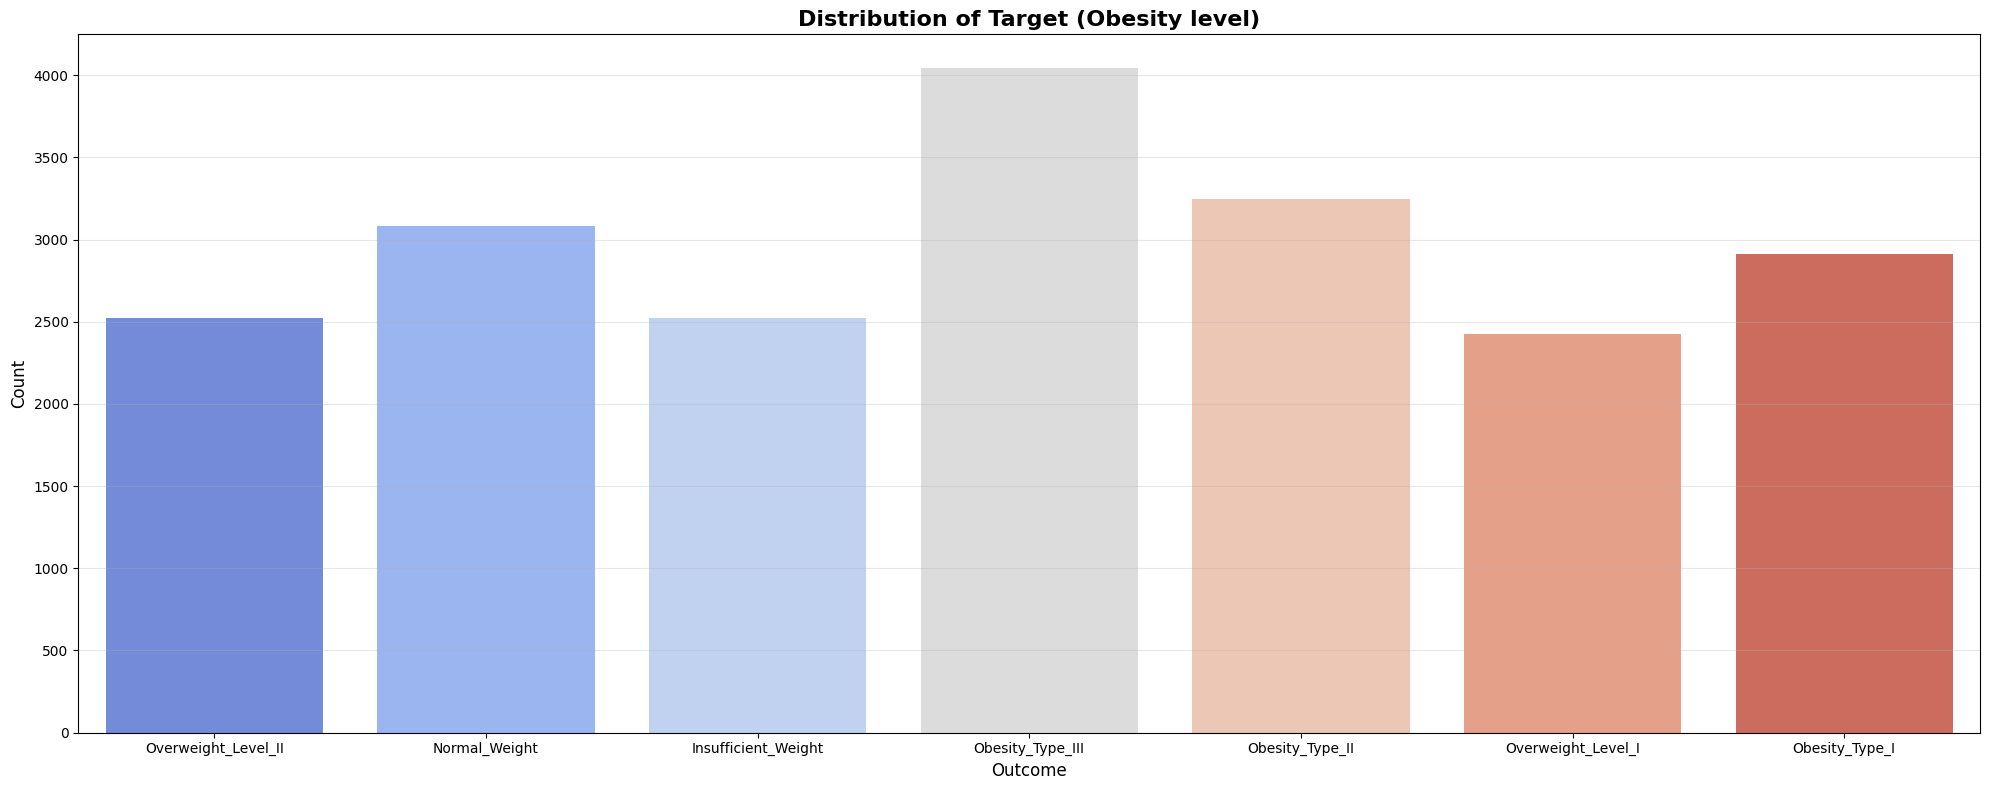

In [25]:
#target distribution
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='NObeyesdad', palette='coolwarm')
plt.title('Distribution of Target (Obesity level)', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

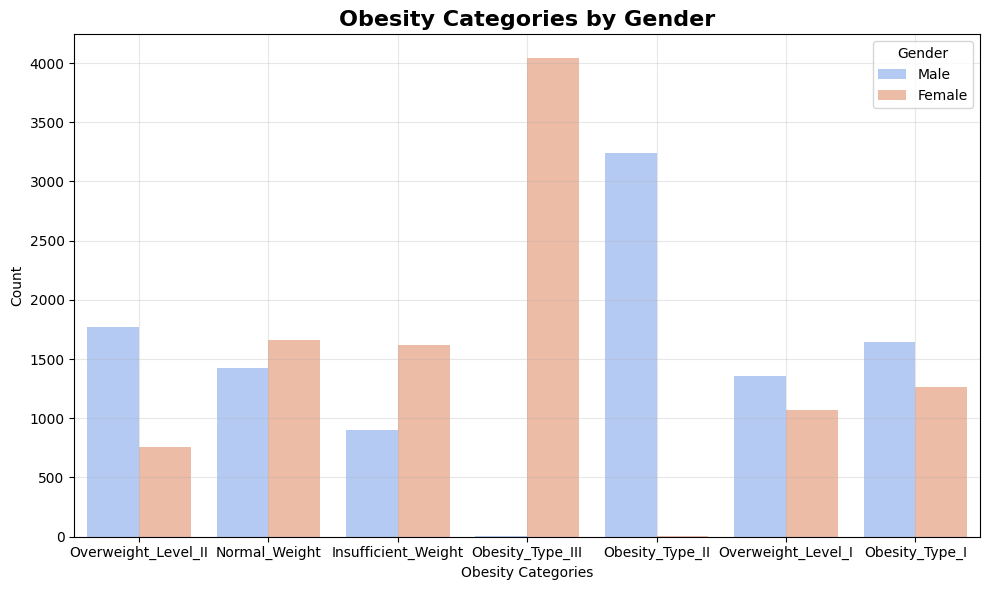

In [26]:
#gender vs obesity categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='Gender', palette='coolwarm')
plt.title('Obesity Categories by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Obesity Categories')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

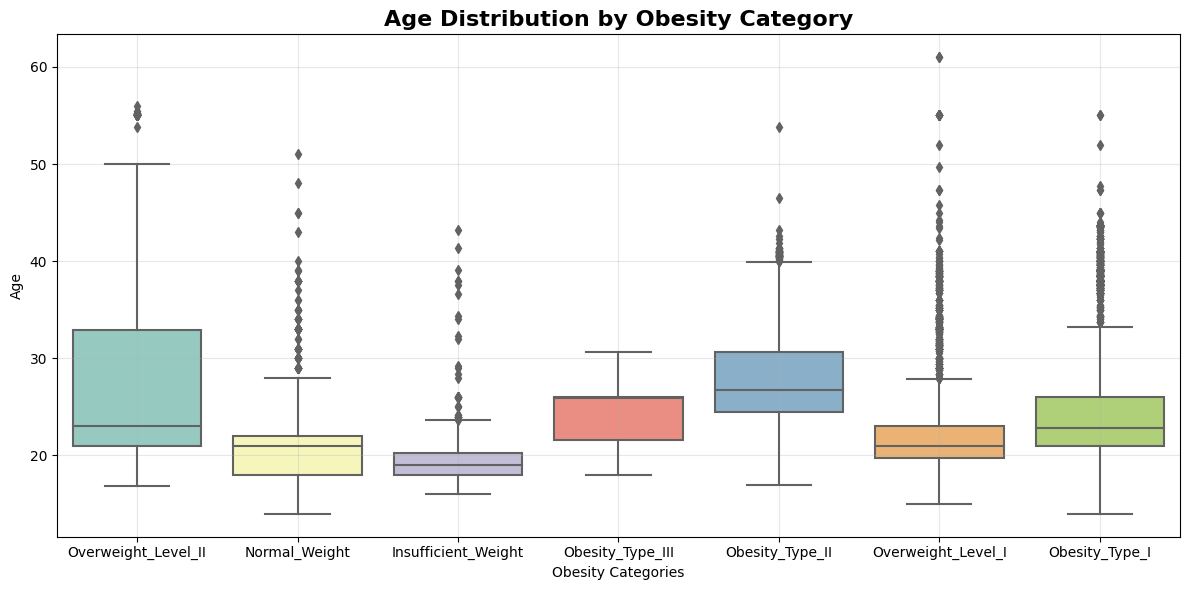

In [27]:
#age distribution across obesity categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Age', palette='Set3')
plt.title('Age Distribution by Obesity Category', fontsize=16, fontweight='bold')
plt.xlabel('Obesity Categories')
plt.ylabel('Age')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

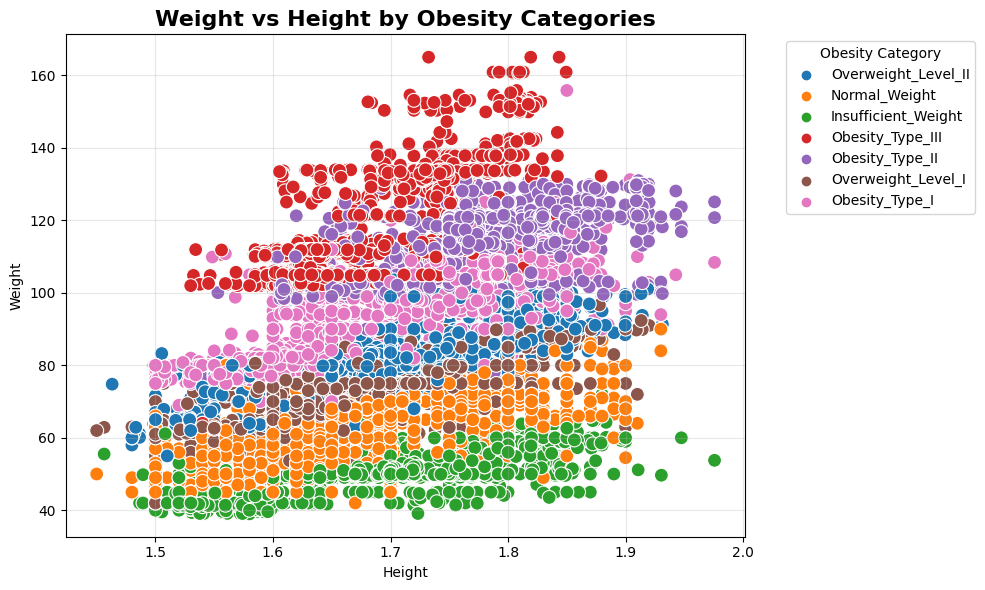

In [28]:
#weight vs height
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='tab10', s=100)
plt.title('Weight vs Height by Obesity Categories', fontsize=16, fontweight='bold')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Obesity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

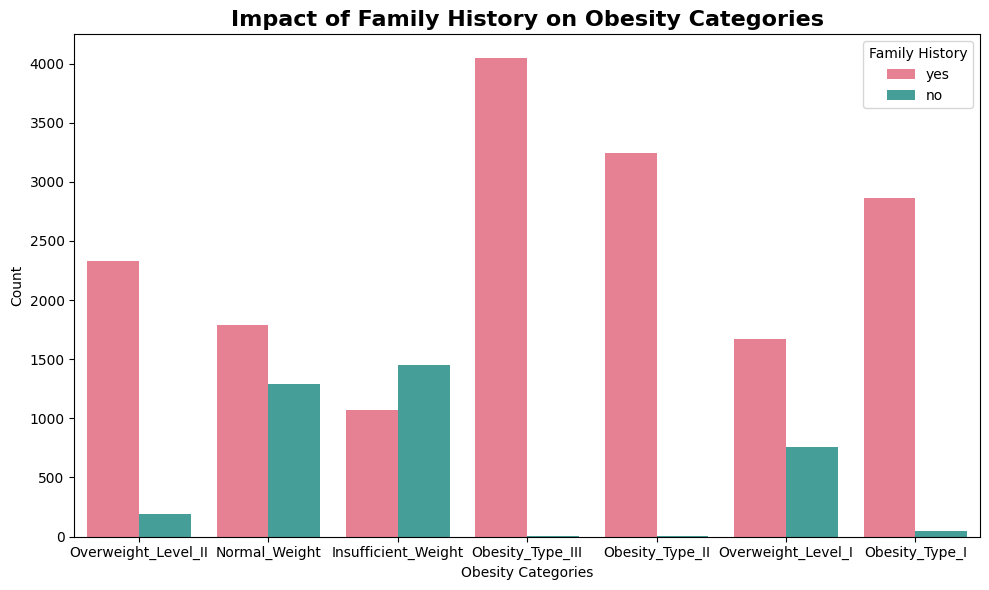

In [29]:
#family history vs obesity categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='family_history_with_overweight', palette='husl')
plt.title('Impact of Family History on Obesity Categories', fontsize=16, fontweight='bold')
plt.xlabel('Obesity Categories')
plt.ylabel('Count')
plt.legend(title='Family History', loc='upper right')
plt.tight_layout()
plt.show()

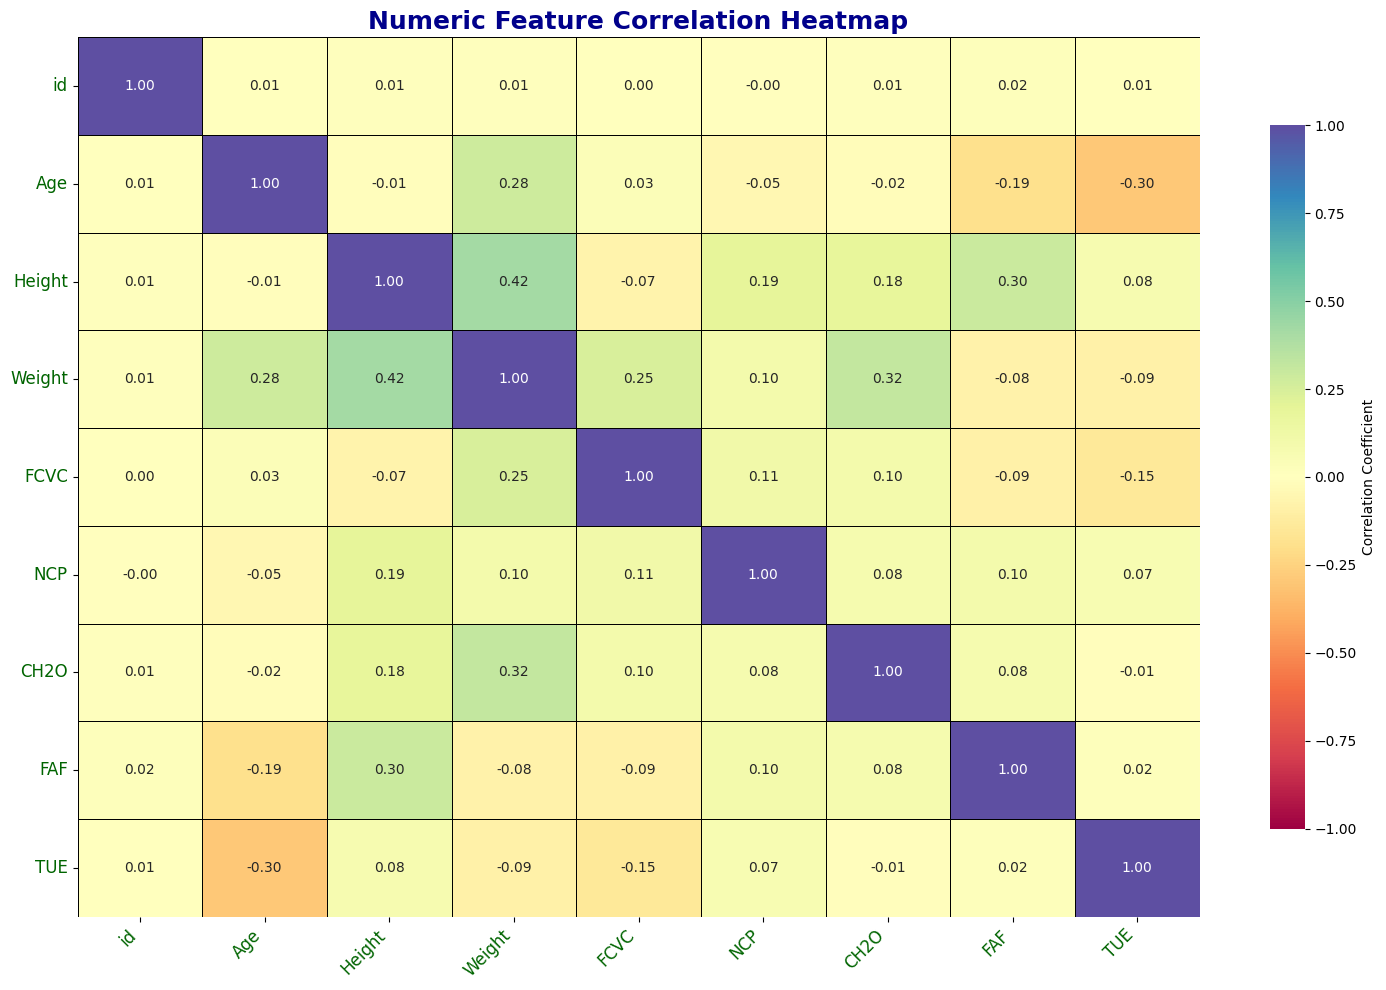

In [30]:
#correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Spectral", 
            vmin=-1, vmax=1, linewidths=0.5, linecolor="black", 
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title("Numeric Feature Correlation Heatmap", fontsize=18, fontweight="bold", color="darkblue")
plt.xticks(fontsize=12, rotation=45, ha="right", color="darkgreen")
plt.yticks(fontsize=12, rotation=0, color="darkgreen")
plt.tight_layout()
plt.show()

### Deep Learning Modelling

In [49]:
#preprocessing the training data
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

x = train.drop(columns=['id', 'NObeyesdad'])
y = train['NObeyesdad']

#one-hot encoding categorical features in training data
x = pd.get_dummies(x, drop_first=True)

In [50]:
#label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=7)

#splitting the dataset into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
#building the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
#training the model
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4772 - loss: 1.5792 - val_accuracy: 0.7179 - val_loss: 0.7789
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6936 - loss: 0.7810 - val_accuracy: 0.7998 - val_loss: 0.5335
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7485 - loss: 0.6360 - val_accuracy: 0.8290 - val_loss: 0.4555
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7772 - loss: 0.5728 - val_accuracy: 0.8507 - val_loss: 0.4065
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.5254 - val_accuracy: 0.8615 - val_loss: 0.3883
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8088 - loss: 0.5173 - val_accuracy: 0.8666 - val_loss: 0.3762
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8128 - loss: 0.4993 - val_accuracy: 0.8633 - val_loss: 0.3709
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8142 - loss: 0.4869 - val_accuracy: 0.

In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,503 (142.59 KB)

 Trainable params: 12,039 (47.03 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 24,080 (94.07 KB)

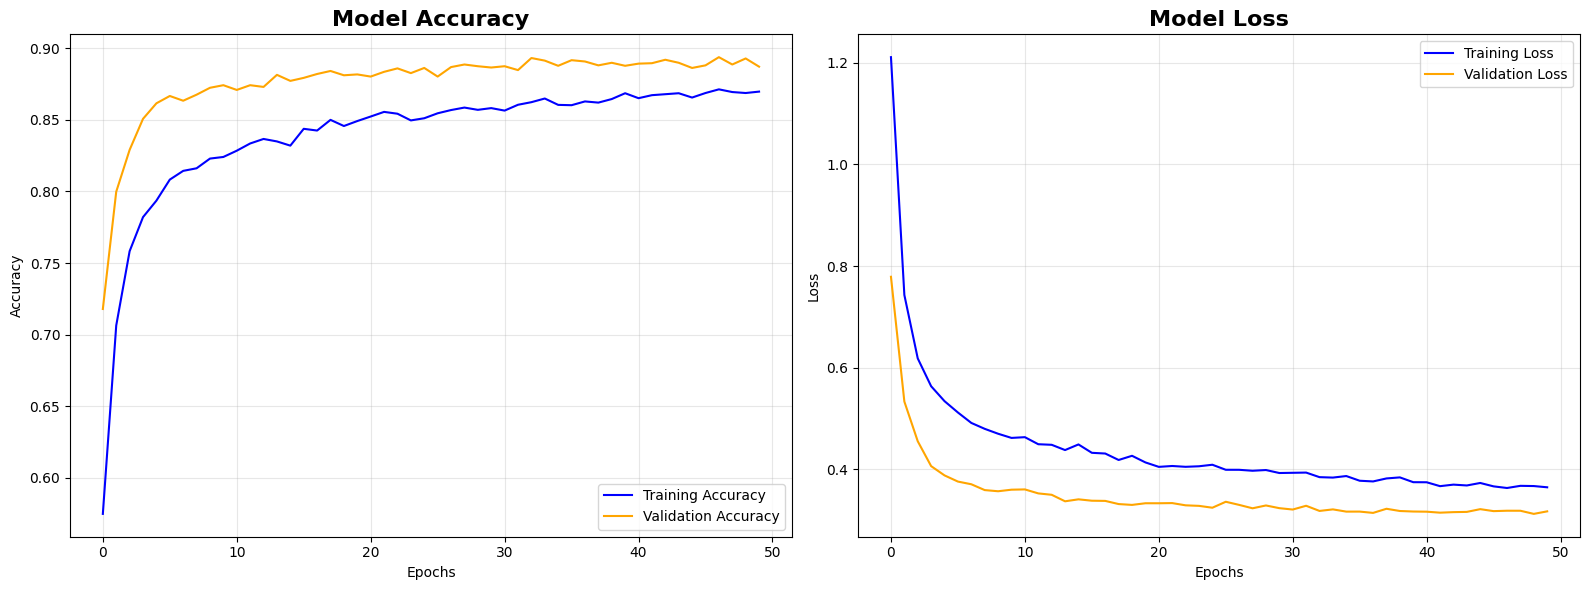

In [54]:
#accuracy and loss Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[0].set_title('Model Accuracy', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', color='blue')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axes[1].set_title('Model Loss', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [55]:
#evaluating the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.3427
Test Accuracy: 0.88


In [56]:
#converting one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test, axis=1)
predicted_classes = np.argmax(model.predict(x_test_scaled), axis=1)
#classification report
report = classification_report(y_test_classes, predicted_classes, target_names=label_encoder.classes_)
print(report)

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.92       524
      Normal_Weight       0.86      0.84      0.85       626
     Obesity_Type_I       0.90      0.82      0.86       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.73      0.76      0.74       484
Overweight_Level_II       0.74      0.77      0.75       514

           accuracy                           0.88      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.89      0.88      0.88      4152



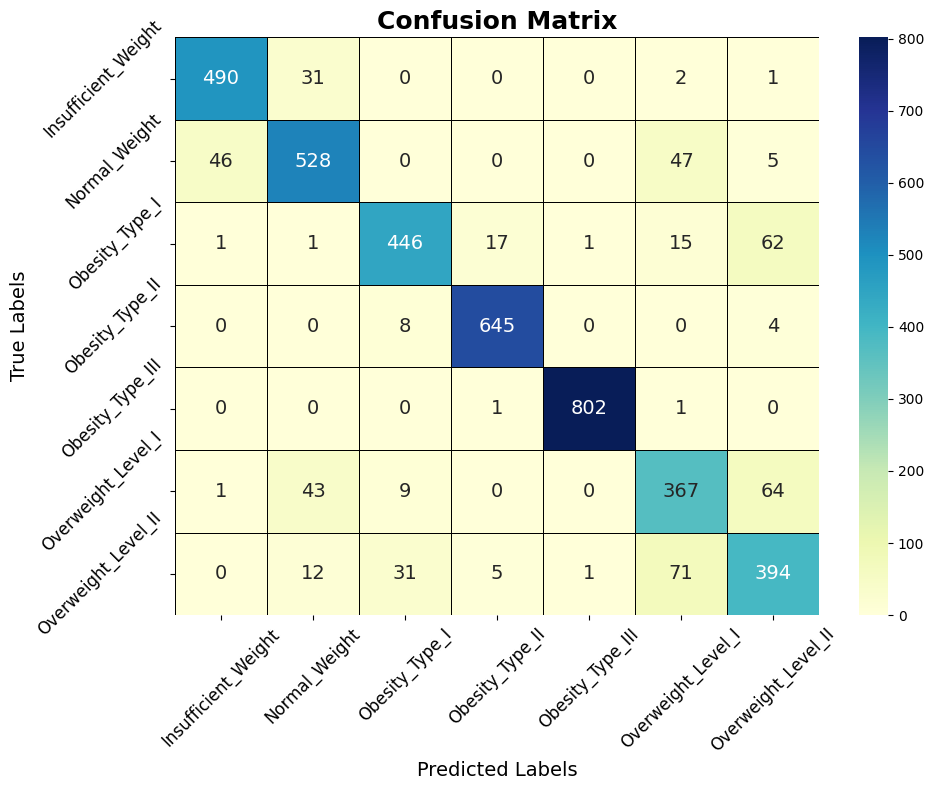

In [57]:
#confusion matrix
cm = confusion_matrix(y_test_classes, predicted_classes)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', cbar=True, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

## **Conclusion**

- The model demonstrates solid overall performance in predicting obesity categories, with balanced precision, recall, and F1-Scores across most classes. The high accuracy of **88%** validates its effectiveness as a classification tool. 